In [1]:
#Generate  data and write a csv file
import csv

# Output filename
filename = "positions.csv"

# Number of entries
num_entries = 100  # You can change this number

# Create and write to the CSV file
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["position"])  # Write header

    for i in range(num_entries):
        writer.writerow([i])  # Write each position

print(f"CSV file '{filename}' created with {num_entries} positions.")


CSV file 'positions.csv' created with 100 positions.


In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("positions.csv")
new=df.iloc[1:].reset_index(drop=True)
new

,position
0,1
1,2
2,3
3,4
4,5
...,...
94,95
95,96
96,97
97,98


In [3]:
position_list = new['position'].tolist()
print(position_list)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [4]:
def kinemat(position_list,dt):
  velocity=[]
  acceleration=[]
  for i in range(0,len(position_list)-2):
    vi=(position_list[i+1]-position_list[i])/dt
    ai=(position_list[i+2]-2*position_list[i+1]+position_list[i])/(dt**2)
    velocity.append(vi)
    acceleration.append(ai)
  return velocity,acceleration



In [5]:
import random

# Parameters
x0 = 0       # initial position (meters)
v0 = 0       # initial velocity (m/s)
a = 2        # acceleration (m/s^2)
t_max = 10   # total time in seconds
dt = 1       # time step in seconds
noise_std = 1.0  # standard deviation of noise (meters)

# Generate noisy positions at each time step
positions = []

for t in range(0, t_max + 1, dt):
    true_x = x0 + v0 * t + 0.5 * a * t**2
    noisy_x = true_x + random.gauss(0, noise_std)
    positions.append(noisy_x)

print(positions)


[0.4442153380670157, -0.064567991011522, 4.834017319441045, 9.286360430474307, 14.579781187686349, 24.806469824511854, 36.46261706559531, 48.23532676062264, 64.5687444096169, 81.50337076143965, 100.12717855342119]


In [6]:
kinemat(positions,3)[0]

[-0.16959444302617924,
 1.6328617701508559,
 1.4841143703444206,
 1.7644735857373472,
 3.4088962122751685,
 3.8853824136944852,
 3.9242365650091102,
 5.444472549664752,
 5.644875450607586]

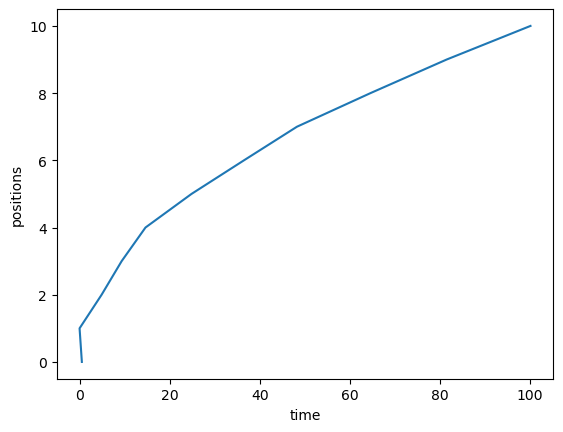

In [7]:
time_points = [i * dt for i in range(len(positions))]

import matplotlib.pyplot as plt

plt.xlabel("time")
plt.ylabel("positions")
plt.plot(positions,time_points)



Text(0, 0.5, 'velocity')

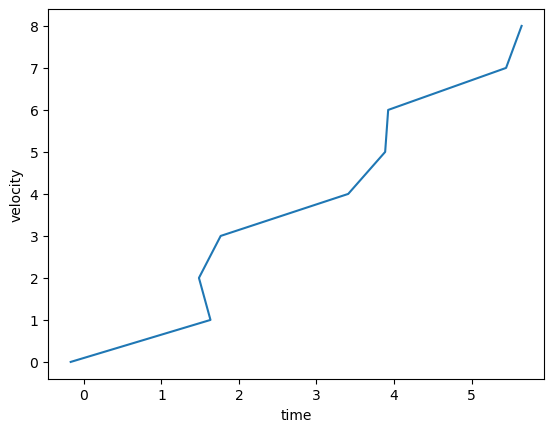

In [11]:
plt.plot(kinemat(positions,3)[0], [i * dt for i in range(len(kinemat(positions,3)[0]))] )
plt.xlabel("time")
plt.ylabel("velocity")

Text(0, 0.5, 'acceleration')

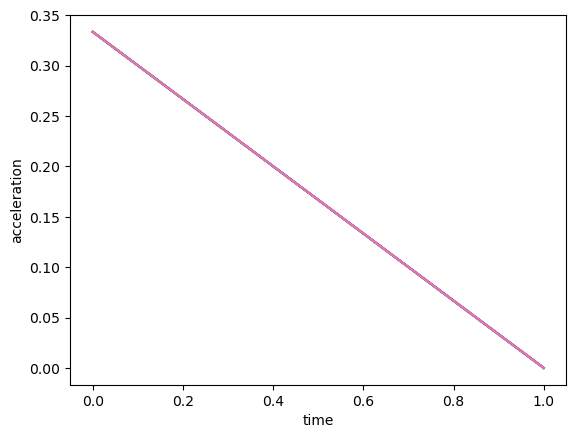

In [12]:
plt.plot(kinemat([i * dt for i in range(len(kinemat(positions,3)[0]))], (positions,3)[1]))
plt.xlabel("time")
plt.ylabel("acceleration")

In [13]:
positions

[0.4442153380670157,
 -0.064567991011522,
 4.834017319441045,
 9.286360430474307,
 14.579781187686349,
 24.806469824511854,
 36.46261706559531,
 48.23532676062264,
 64.5687444096169,
 81.50337076143965,
 100.12717855342119]